# 3) Latent Dirichlet Allocation
We’ll utilize the dataset of papers from the NeurIPS (NIPS) conference https://www.kaggle.com/datasets/ benhamner/nips-papers, one of the most esteemed annual gatherings in the machine learning field, for this assignment. The CSV data file includes details on the many NeurIPS articles that have been published between
1
 Lab Course Machine Learning
Exercise Sheet 11 – Prof. Dr. Dr. Lars Schmidt-Thieme 2/2
Kiran Madhusudhanan
1987 and 2016 (that’s 29 years!). These articles cover a wide range of machine learning issues, including neural networks, optimization techniques, and many more.

In [2]:
# Importing necessary modules
import pandas as pd
import os
os.chdir('..')
# Read csv file
dataset = pd.read_csv("/content/papers.csv")
# View the first few datapoints of the csv file
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# Remove the columns
dataset = dataset.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
dataset.head()

,year,title,abstract,paper_text
1913,2004,Supervised Graph Inference,Abstract Missing,Supervised graph inference\n\nJean-Philippe Ve...
5655,2016,Bayesian Optimization with Robust Bayesian Neu...,Bayesian optimization is a prominent method fo...,Bayesian Optimization with\nRobust Bayesian Ne...
3862,2012,Emergence of Object-Selective Features in Unsu...,Recent work in unsupervised feature learning h...,Emergence of Object-Selective Features in\nUns...
4508,1991,A Topographic Product for the Optimization of ...,Abstract Missing,A Topographic Product for the Optimization\nof...
1125,2001,Modeling Temporal Structure in Classical Condi...,Abstract Missing,Modeling Temporal Structure in Classical\nCond...


In [4]:
# Loading the regular expression library
import re
# Remove punctuation
dataset['paper_text_processed'] = dataset['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
dataset['paper_text_processed'] = dataset['paper_text_processed'].map(lambda x: x.lower())
dataset['paper_text_processed'].head()

1913    supervised graph inference\n\njean-philippe ve...
5655    bayesian optimization with\nrobust bayesian ne...
3862    emergence of object-selective features in\nuns...
4508    a topographic product for the optimization\nof...
1125    modeling temporal structure in classical\ncond...
Name: paper_text_processed, dtype: object

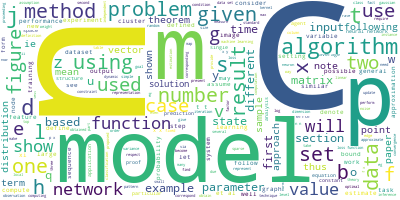

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(dataset['paper_text_processed'].values))
# Create a WordCloud object
wordcloud_object = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud_object.generate(long_string)
# Visualize the word cloud
wordcloud_object.to_image()

In [6]:
# Using Gensim Library for the following analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Function to get words from sentences 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Function to remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = dataset.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
import gensim.corpora as corpora
# Creating a Dictionary
word_id = corpora.Dictionary(data_words)
# Creating Corpus
texts = data_words
# Term Document Frequency
corpus = [word_id.doc2bow(text) for text in texts]
# View
# print(corpus[:1][0][:30])

In [8]:
from pprint import pprint
# number of topics
num_topics = 10
# Building an LDA model
model = gensim.models.LdaMulticore(corpus=corpus,id2word=word_id,num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(model.print_topics())
doc_lda = model[corpus]

[(0,
  '0.006*"algorithm" + 0.006*"data" + 0.006*"model" + 0.005*"learning" + '
  '0.004*"function" + 0.004*"set" + 0.004*"one" + 0.003*"number" + 0.003*"two" '
  '+ 0.003*"network"'),
 (1,
  '0.008*"data" + 0.006*"model" + 0.005*"learning" + 0.005*"set" + '
  '0.005*"function" + 0.004*"network" + 0.004*"one" + 0.004*"algorithm" + '
  '0.004*"using" + 0.004*"input"'),
 (2,
  '0.006*"data" + 0.006*"function" + 0.005*"learning" + 0.004*"using" + '
  '0.004*"algorithm" + 0.004*"model" + 0.004*"set" + 0.004*"matrix" + '
  '0.004*"one" + 0.003*"figure"'),
 (3,
  '0.007*"data" + 0.005*"learning" + 0.004*"set" + 0.004*"model" + '
  '0.004*"algorithm" + 0.004*"matrix" + 0.004*"using" + 0.004*"method" + '
  '0.003*"xi" + 0.003*"function"'),
 (4,
  '0.008*"algorithm" + 0.005*"model" + 0.005*"set" + 0.004*"time" + '
  '0.004*"function" + 0.004*"problem" + 0.004*"learning" + 0.004*"matrix" + '
  '0.004*"loss" + 0.003*"data"'),
 (5,
  '0.006*"model" + 0.006*"function" + 0.005*"algorithm" + 0.005*"s

In [9]:
# pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c0bd3ced7adbc0d87eb18ab345b374e62a45d395b9d6e25b423a01470bf94e8b
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ee7b5e632871c2e5f453d36ba16a3289c6acecde6d9ccdb34bea1e465b5c887d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


# Visualisation

In [11]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/visualisation'+str(num_topics))

# Visualization
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, word_id)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/visualisation'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.002728  0.002506       1        1  16.360660
1      0.001201  0.007001       2        1  13.248895
2      0.000928  0.000711       3        1  11.117207
5     -0.000024  0.002458       4        1  10.187815
7      0.002311 -0.000482       5        1  10.053218
3     -0.005943 -0.005396       6        1   8.811466
8      0.003383 -0.009915       7        1   8.786888
0     -0.002102  0.005697       8        1   8.456979
4      0.010795 -0.000418       9        1   7.434390
6     -0.007820 -0.002163      10        1   5.542482, topic_info=            Term         Freq        Total Category  logprob  loglift
17     algorithm  1119.000000  1119.000000  Default  30.0000  30.0000
153         data  1361.000000  1361.000000  Default  29.0000  29.0000
815           xi   615.000000   615.000000  Default  28.0000  28.0000
469        model  1165.000000  1165.000000  Default  27.0000  27.0000
443       matrix   732.000000   732.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
515          one    33.057309   808.488422  Topic10  -5.9401  -0.3042
258        first    27.159910   504.264670  Topic10  -6.1366  -0.0286
50         based    27.530646   538.114459  Topic10  -6.1230  -0.0800
358  information    26.569890   482.702535  Topic10  -6.1585  -0.0069
450       method    26.305549   557.591647  Topic10  -6.1685  -0.1611

[854 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
14565      1  0.217563     abe
14565      3  0.217563     abe
14565      7  0.217563     abe
14565      9  0.217563     abe
5832       1  0.136694  action
...      ...       ...     ...
4165       6  0.063166      zt
4165       7  0.031583      zt
4165       8  0.073694      zt
4165       9  0.178972      zt
4165      10  0.031583      zt

[3953 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 3, 6, 8, 4, 9, 1, 5, 7])

In [1]:
# For Dynamic Visualisation refer to the html file attached